In [73]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('results.csv')
df.columns = df.columns.str.strip()
df['Algorithm']=df['Algorithm'].str.strip()
df['Benchmark']=df['Benchmark'].str.strip()

In [74]:
df.head()

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.188930,0.995865,0.81160
1,bimodal,perl,1.933900,0.971272,3.97542
2,bimodal,soplex,0.287601,0.928403,12.97650
3,bimodal,povray,1.284190,0.927332,10.52470
4,gshare,gcc,2.208660,0.996729,0.64190


In [75]:
df[df['Benchmark'] == 'gcc']

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.18893,0.995865,0.81160
4,gshare,gcc,2.20866,0.996729,0.64190
8,hp,gcc,2.22541,0.997362,0.51766
12,perceptron,gcc,2.21491,0.996879,0.61248


In [76]:
df.loc[df['Algorithm'] == 'bimodal']

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.188930,0.995865,0.81160
1,bimodal,perl,1.933900,0.971272,3.97542
2,bimodal,soplex,0.287601,0.928403,12.97650
3,bimodal,povray,1.284190,0.927332,10.52470


In [77]:
[item for sublist in df.loc[df['Benchmark'] == 'gcc', ['IPC']].values.tolist() for item in sublist]

[2.18893, 2.20866, 2.22541, 2.21491]

In [83]:
def draw_bar_graph_int(metric):
        # set width of bar
        barWidth = 0.1
        fig = plt.subplots(figsize =(12, 8))

        # set height of bar
        bimodal = [item for sublist in df.loc[df['Algorithm'] == 'bimodal', [metric]].values.tolist() for item in sublist][0:2]
        gshare = [item for sublist in df.loc[df['Algorithm'] == 'gshare', [metric]].values.tolist() for item in sublist][0:2]
        hp = [item for sublist in df.loc[df['Algorithm'] == 'hp', [metric]].values.tolist() for item in sublist][0:2]
        perceptron = [item for sublist in df.loc[df['Algorithm'] == 'perceptron', [metric]].values.tolist() for item in sublist][0:2]

        full_list = bimodal + gshare + hp + perceptron
        mean = np.mean(full_list)
        std = np.std(full_list)
        
        # Set position of bar on X axis
        br1 = np.arange(len(bimodal))
        br2 = [x + barWidth for x in br1]
        br3 = [x + barWidth for x in br2]
        br4 = [x + barWidth for x in br3]

        # Make the plot
        plt.bar(br1, bimodal, color ='r', width = barWidth,
                edgecolor ='grey', label ='bimodal')
        plt.bar(br2, gshare, color ='g', width = barWidth,
                edgecolor ='grey', label ='gshare')
        plt.bar(br3, hp, color ='b', width = barWidth,
                edgecolor ='grey', label ='hp')
        plt.bar(br4, perceptron, color ='m', width = barWidth,
                edgecolor ='grey', label ='perceptron')

        plt.ylim(max(min(full_list)-std, 0), max(full_list)+std)

        # Adding Xticks
        plt.xlabel('Benchmark', fontweight ='bold', fontsize = 15)
        plt.ylabel(metric, fontweight ='bold', fontsize = 15)
        plt.xticks([r + barWidth for r in range(len(bimodal))],
                ['gcc', 'perl'])

        plt.legend()
        plt.show()

In [85]:
def draw_bar_graph_float(metric):
        # set width of bar
        barWidth = 0.1
        fig = plt.subplots(figsize =(12, 8))

        # set height of bar
        bimodal = [item for sublist in df.loc[df['Algorithm'] == 'bimodal', [metric]].values.tolist() for item in sublist][2:]
        gshare = [item for sublist in df.loc[df['Algorithm'] == 'gshare', [metric]].values.tolist() for item in sublist][2:]
        hp = [item for sublist in df.loc[df['Algorithm'] == 'hp', [metric]].values.tolist() for item in sublist][2:]
        perceptron = [item for sublist in df.loc[df['Algorithm'] == 'perceptron', [metric]].values.tolist() for item in sublist][2:]

        full_list = bimodal + gshare + hp + perceptron
        mean = np.mean(full_list)
        std = np.std(full_list)
        
        # Set position of bar on X axis
        br1 = np.arange(len(bimodal))
        br2 = [x + barWidth for x in br1]
        br3 = [x + barWidth for x in br2]
        br4 = [x + barWidth for x in br3]

        # Make the plot
        plt.bar(br1, bimodal, color ='r', width = barWidth,
                edgecolor ='grey', label ='bimodal')
        plt.bar(br2, gshare, color ='g', width = barWidth,
                edgecolor ='grey', label ='gshare')
        plt.bar(br3, hp, color ='b', width = barWidth,
                edgecolor ='grey', label ='hp')
        plt.bar(br4, perceptron, color ='m', width = barWidth,
                edgecolor ='grey', label ='perceptron')

        plt.ylim(max(min(full_list)-std, 0), max(full_list)+std)

        # Adding Xticks
        plt.xlabel('Benchmark', fontweight ='bold', fontsize = 15)
        plt.ylabel(metric, fontweight ='bold', fontsize = 15)
        plt.xticks([r + barWidth for r in range(len(bimodal))],
                ['soplex', 'povray'])

        plt.legend()
        plt.show()

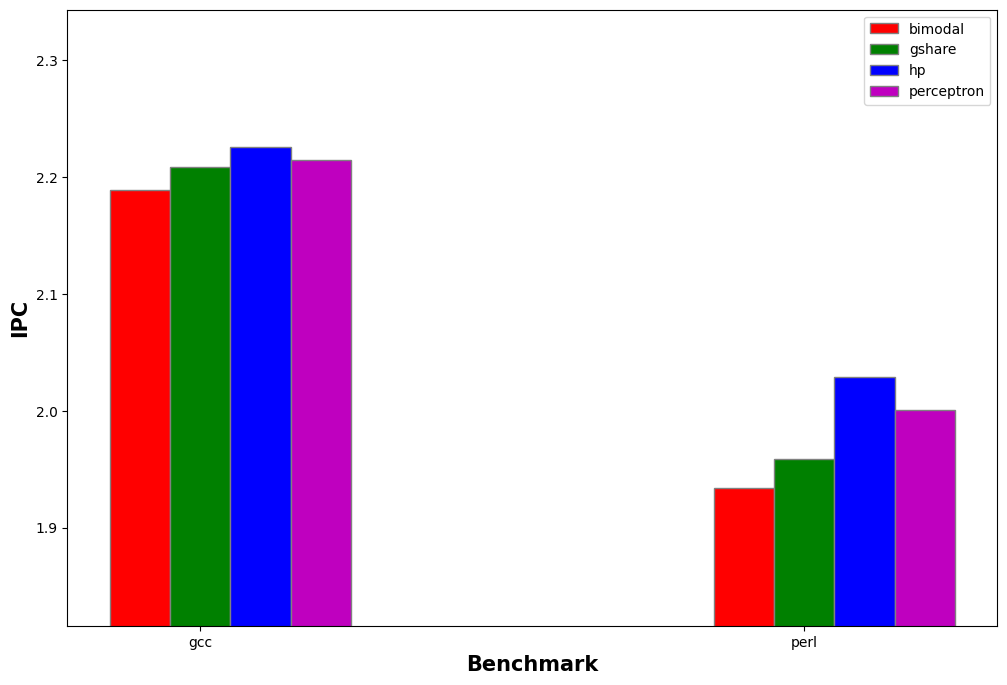

In [86]:
draw_bar_graph_int('IPC')

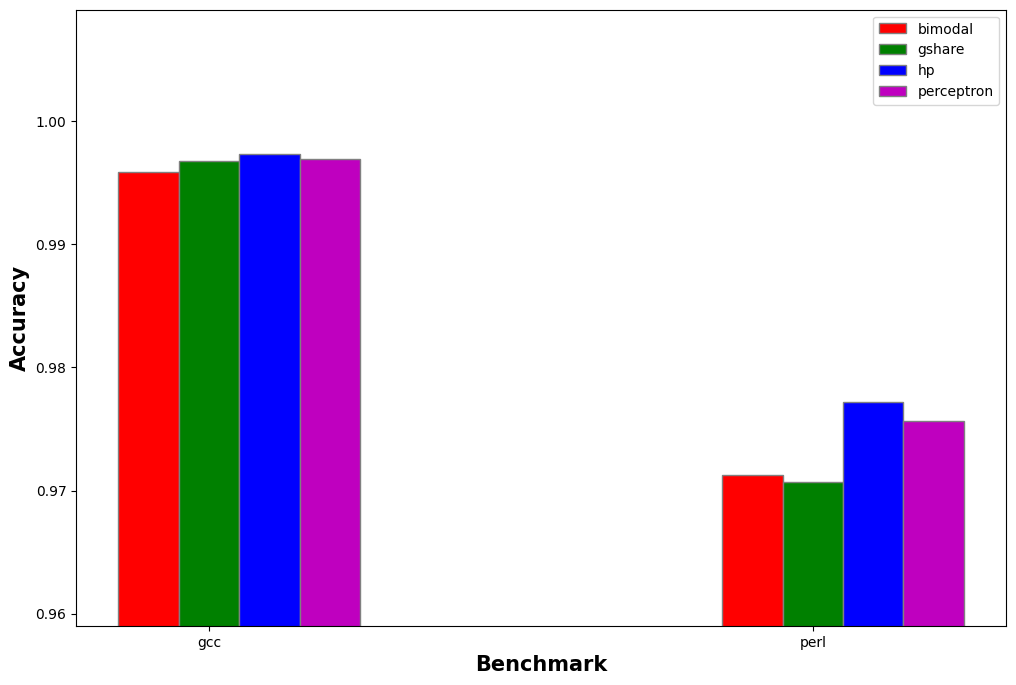

In [87]:
draw_bar_graph_int('Accuracy')

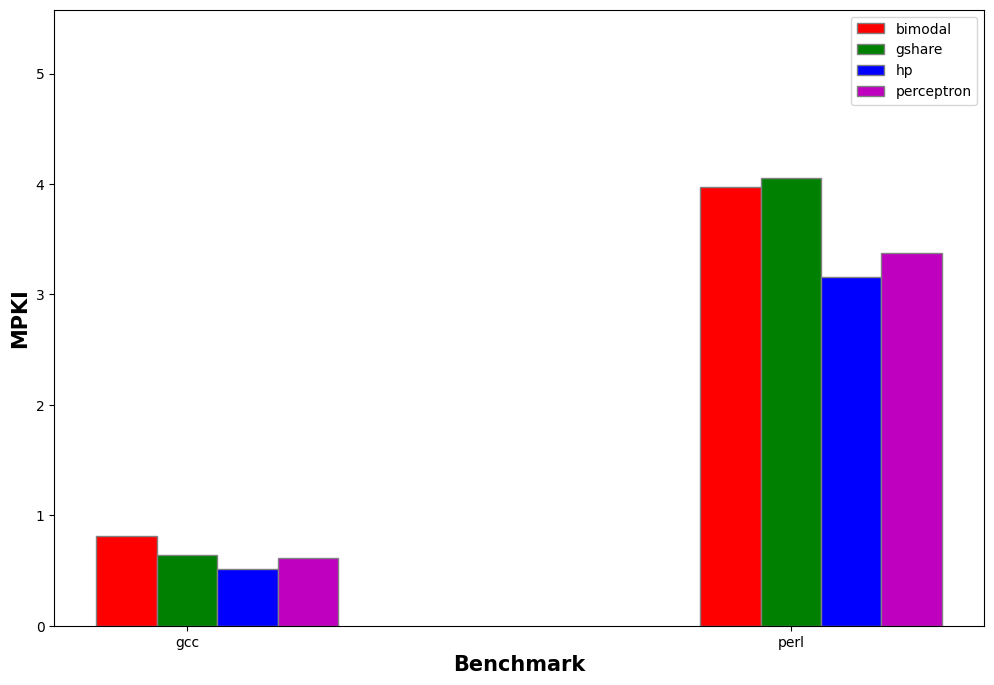

In [88]:
draw_bar_graph_int('MPKI')

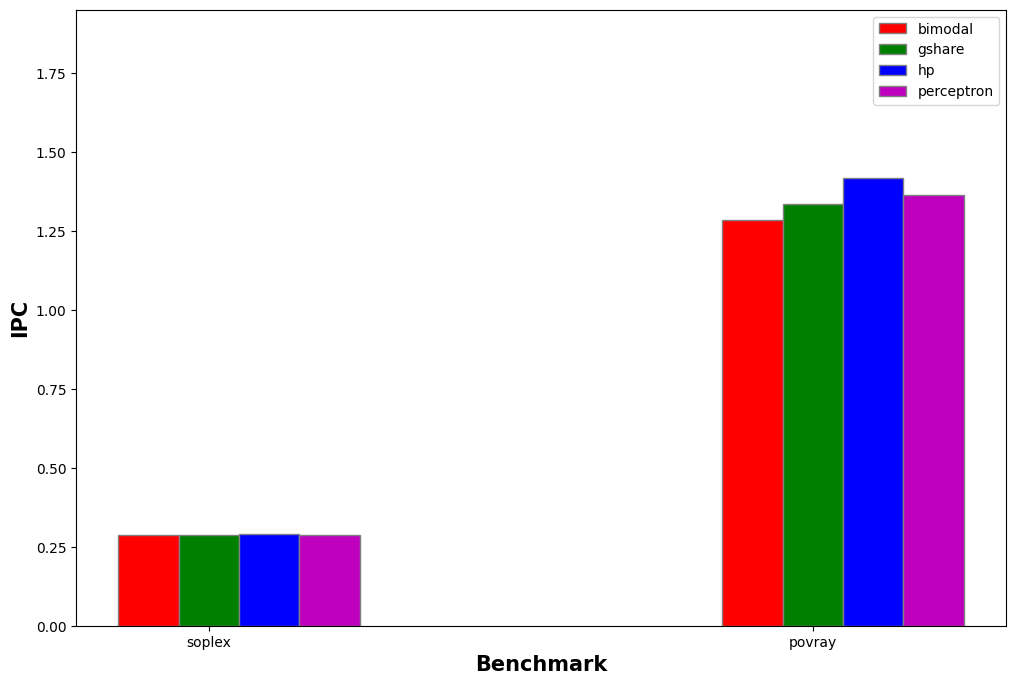

In [89]:
draw_bar_graph_float('IPC')

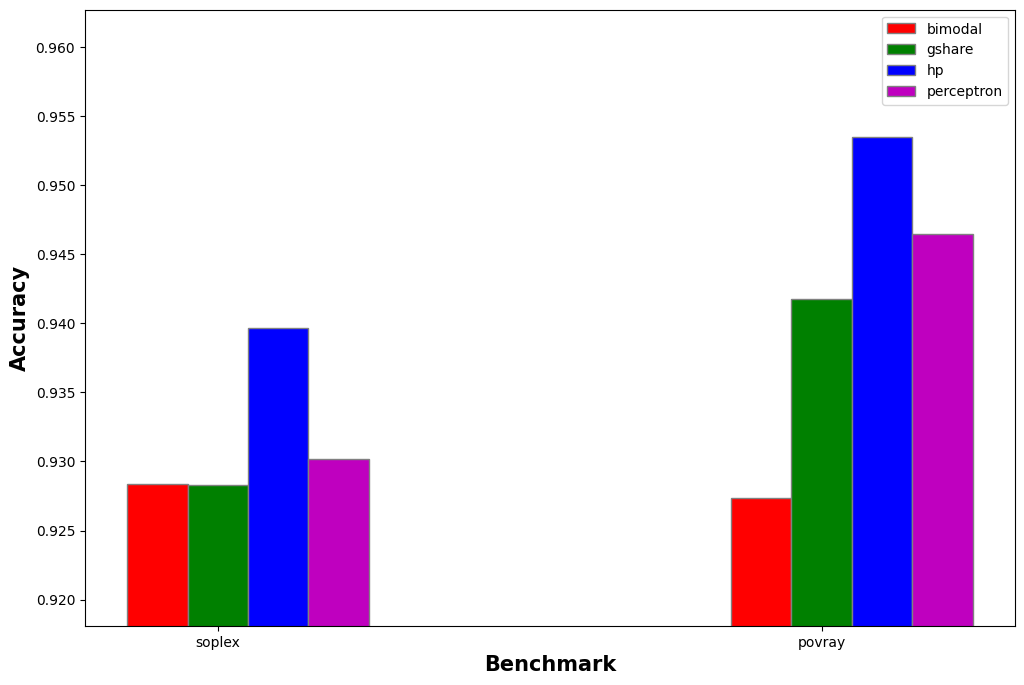

In [90]:
draw_bar_graph_float('Accuracy')

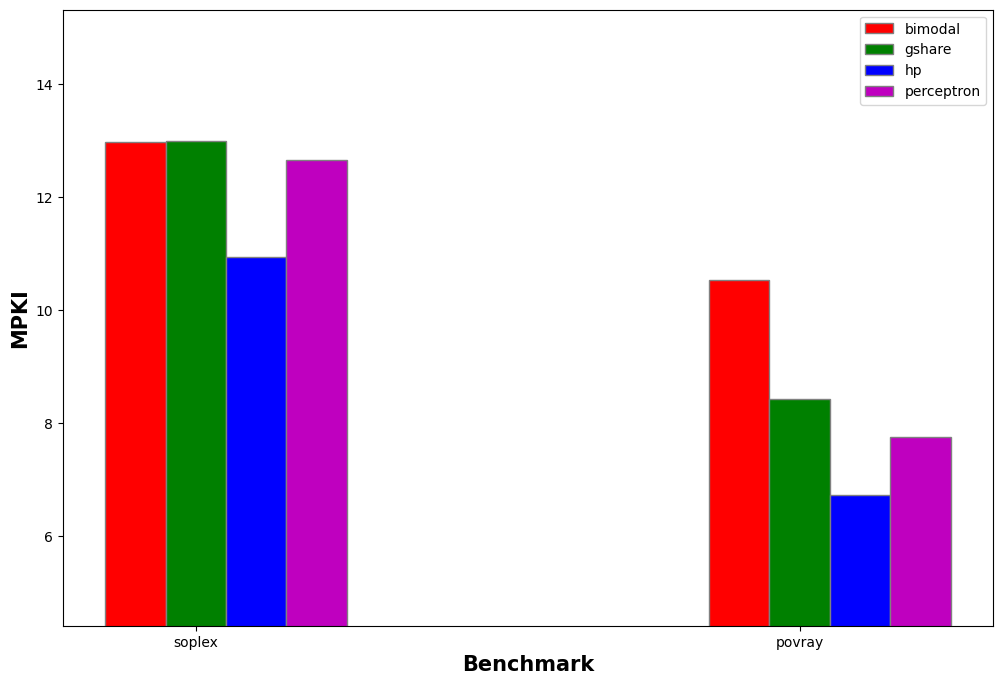

In [91]:
draw_bar_graph_float('MPKI')